In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [39]:
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv('survey.csv')

In [41]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [43]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

# Data outline

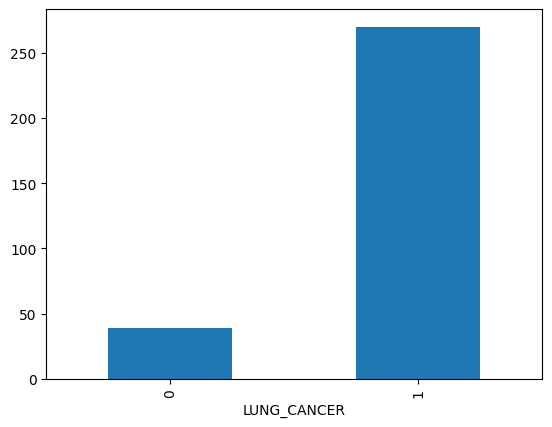

In [13]:
df.groupby('LUNG_CANCER')['LUNG_CANCER'].count().plot.bar();

In data, lung cancer positive case are more than 5 times than negative case.

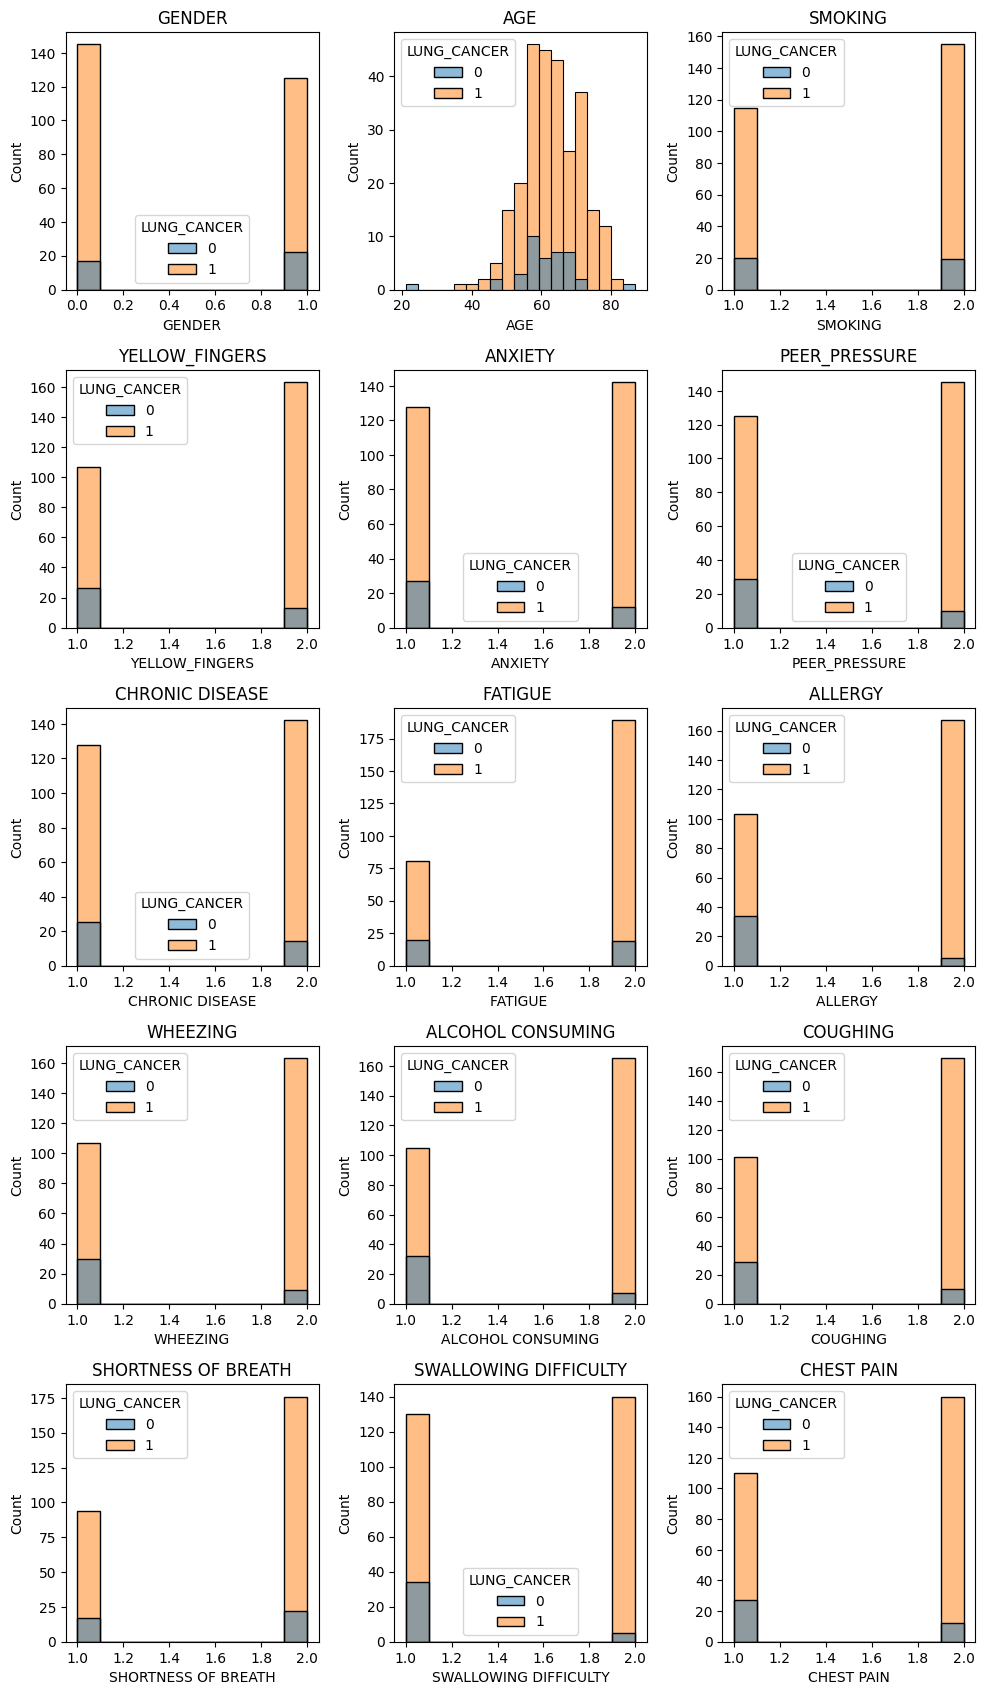

In [14]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

We can find that in many cases, there are opposite trend between lung cance positive and negative except 'AGE','SMOKING' and 'SHORTNESS OF BREATH'.

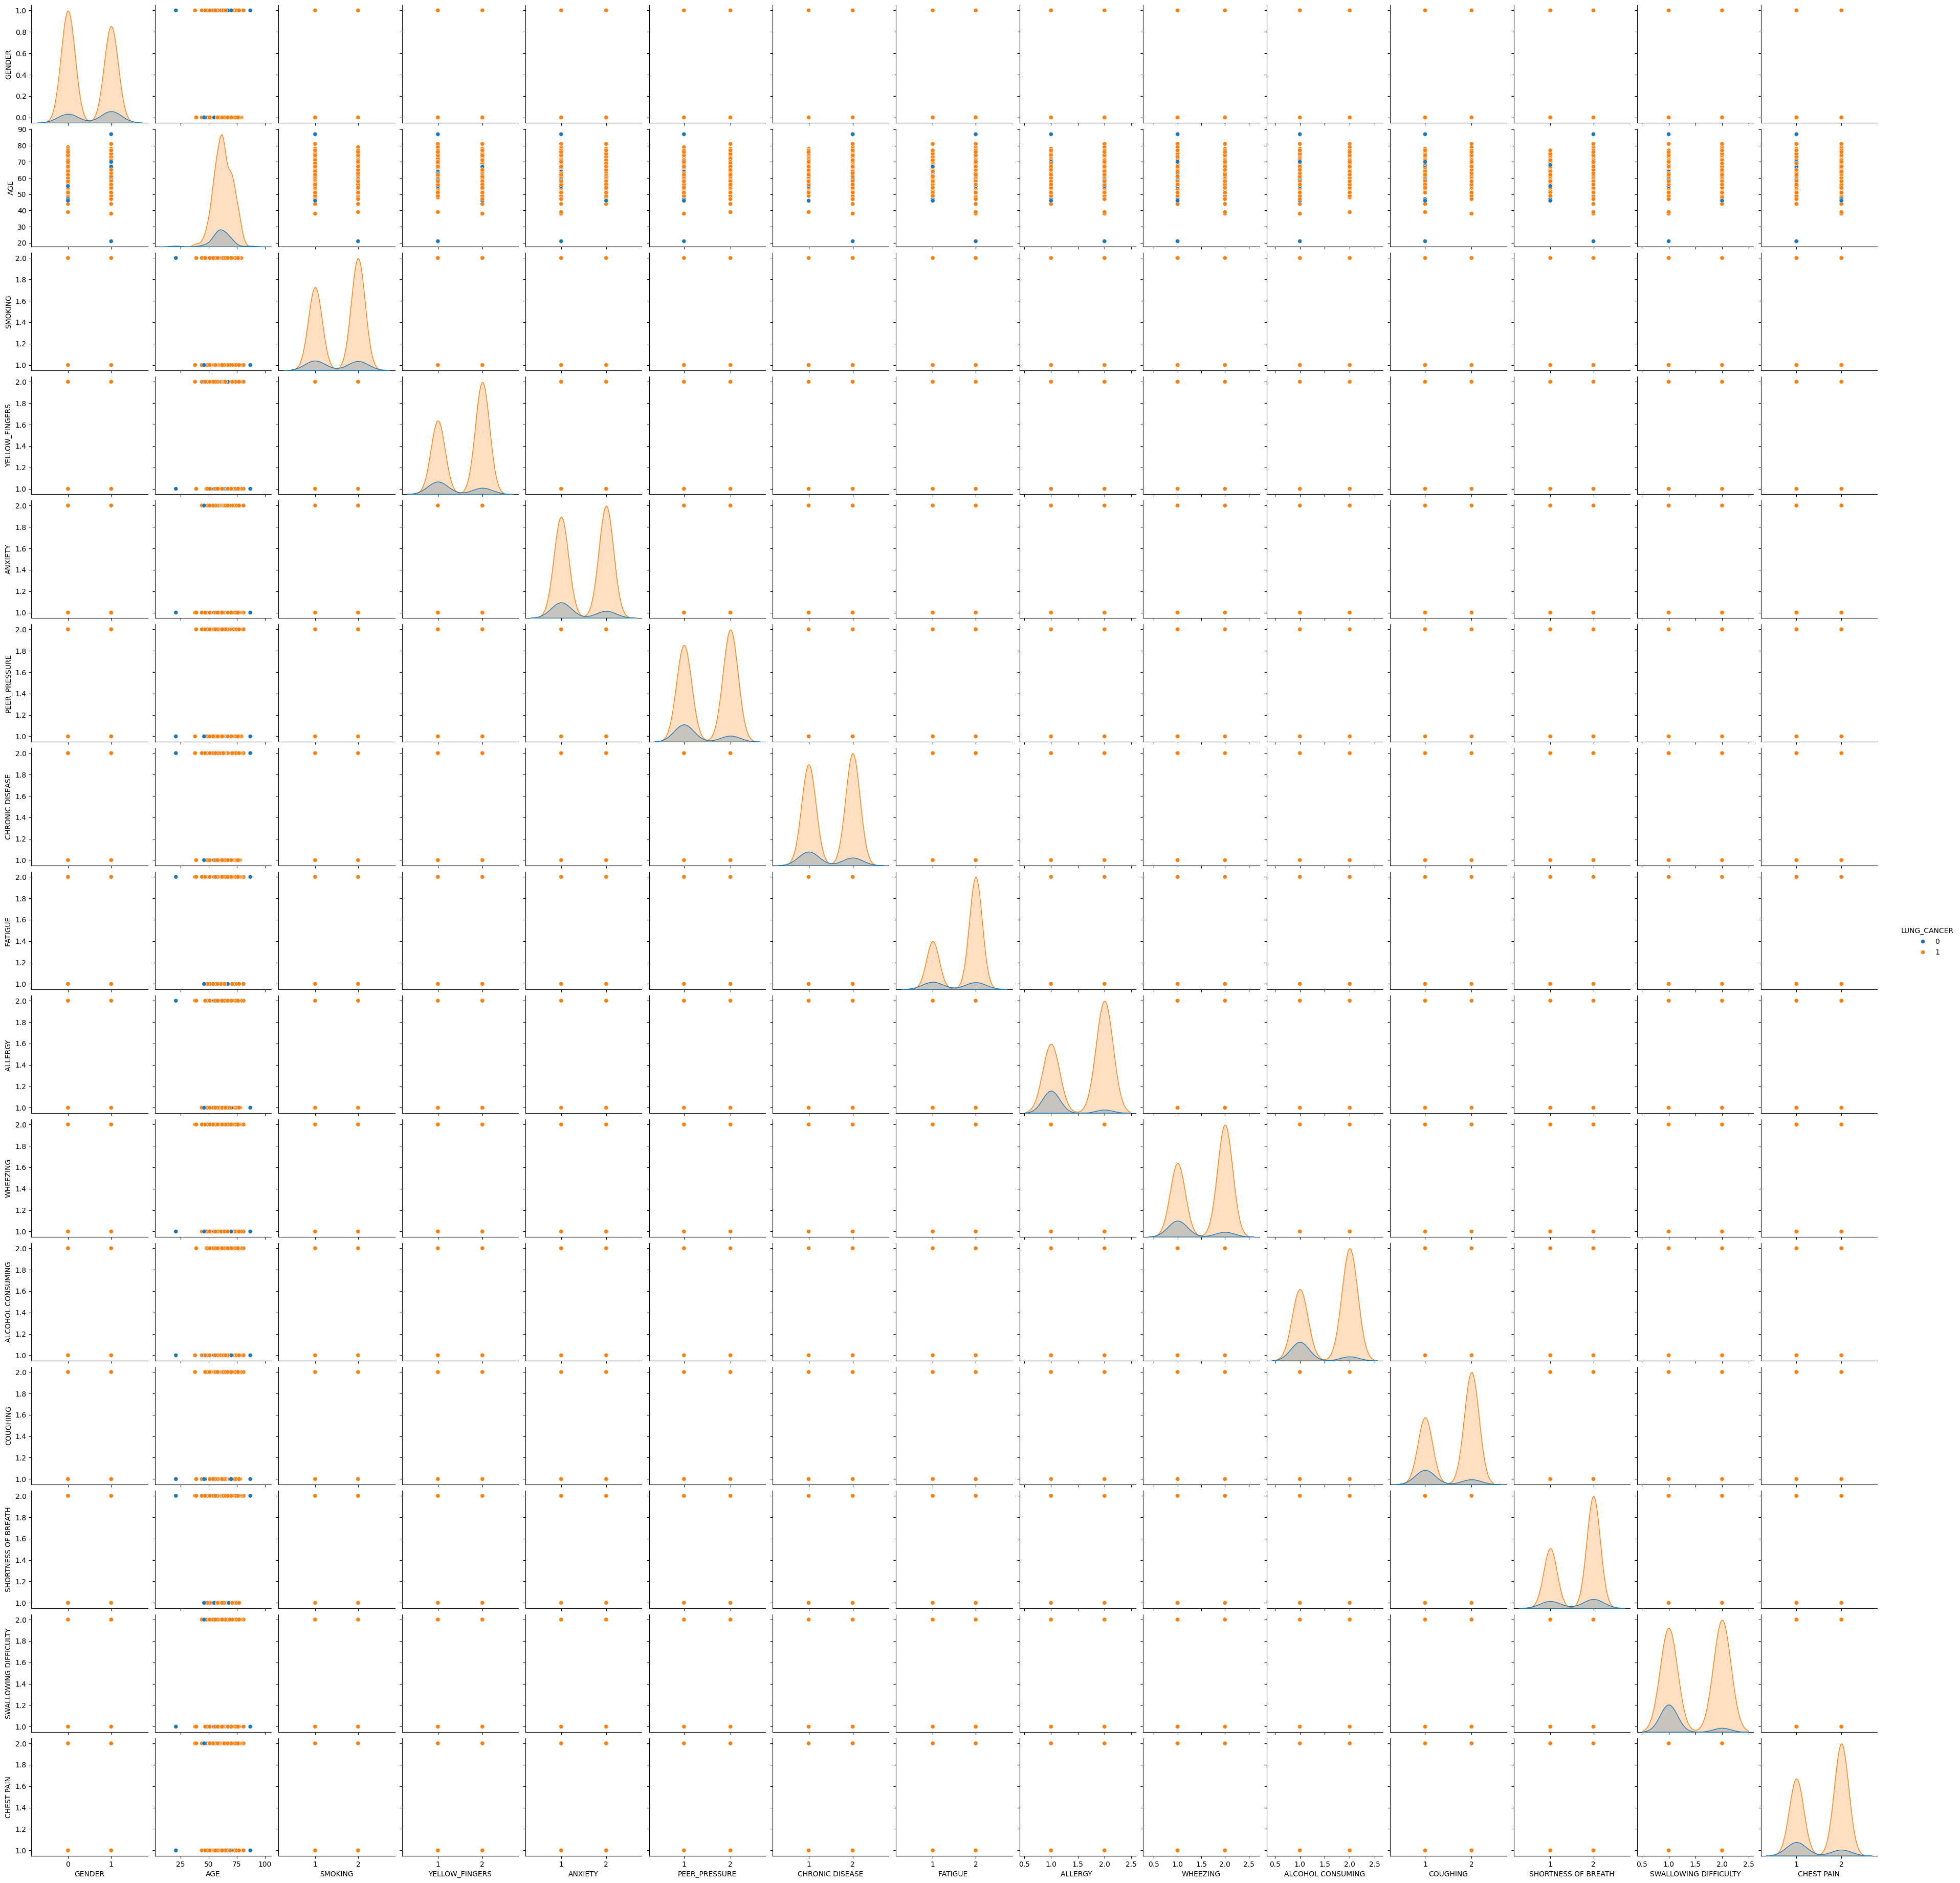

In [15]:
sns.pairplot(df,hue='LUNG_CANCER');

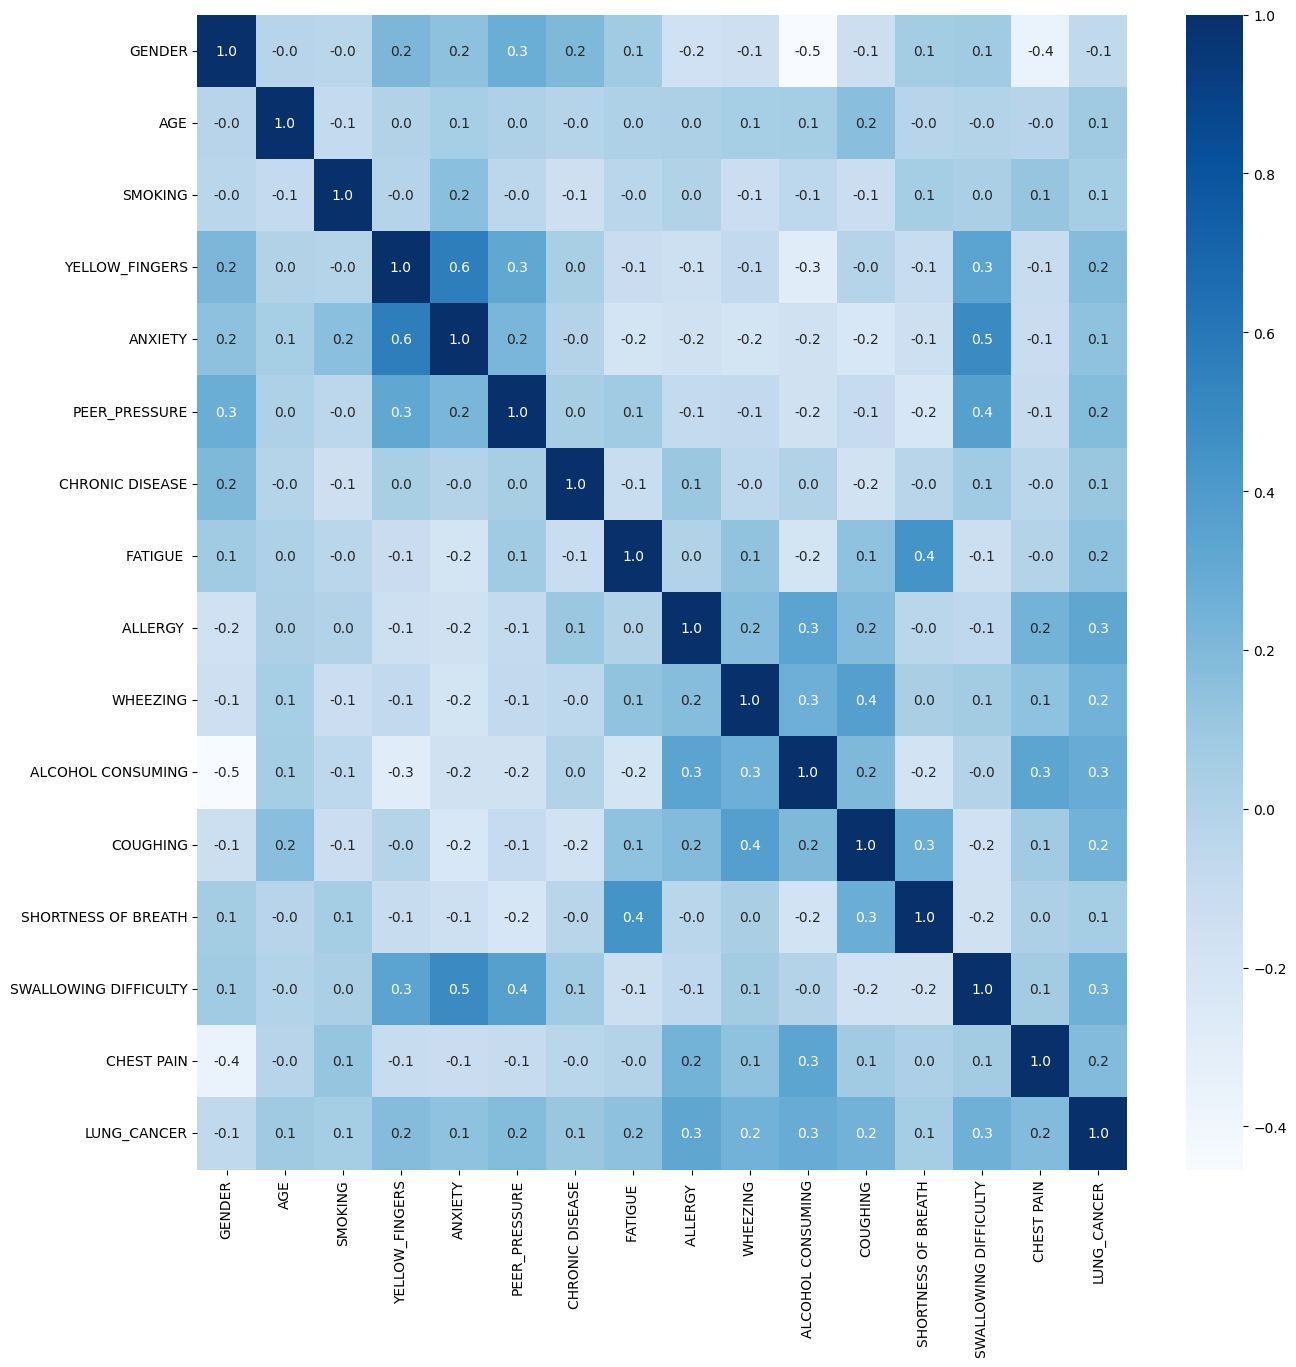

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

In [17]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Correlation among features are
* 'ANXIETY' and 'SWALLOWING DIFFICULTY' : 0.5
* 'PEER_PRESSURE' and 'SWALLOWING DIFFICULTY' : 0.4
* 'FATIGUE ' and 'SHORTNESS OF BREATH' : 0.4
* 'GENDER' and 'CHEST PAIN' : -0.4
* 'GENDER' and 'ALCOHOL CONSUMING' : -0.5

Correlation with 'LUNG CANCER' are
* 'ALLERGY ', 'ALCOHOL CONSUMING' and 'SWALLOWING DIFFICULTY' : 0.3
* 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'WHEEZING', 'COUGHING' and 'CHEST PAIN' : 0.2

# Classify Modeling by Artificial Neural Network

In [18]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1324  
Train score: 0.12944401800632477
Train accuracy: 0.9537037014961243
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
********************
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9649 - loss: 0.0975 
Test score: 0.1299402117729187
Test accuracy: 0.9569892287254333


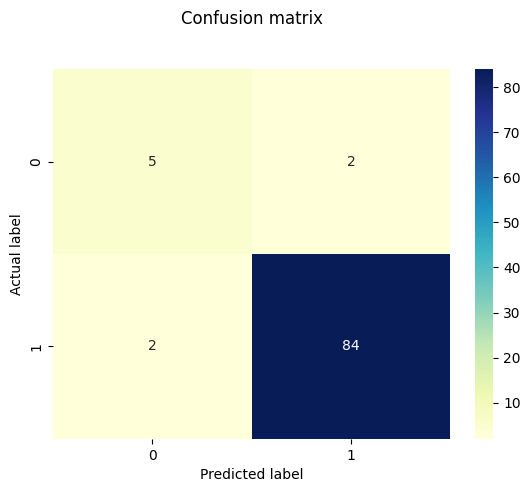

In [22]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98        86

    accuracy                           0.96        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.96      0.96      0.96        93



In this model, we can realize high accuracy and recall to classify 'positive case'. The important thing is that how we can not miss 'positive case'. And I also looked into ROC.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


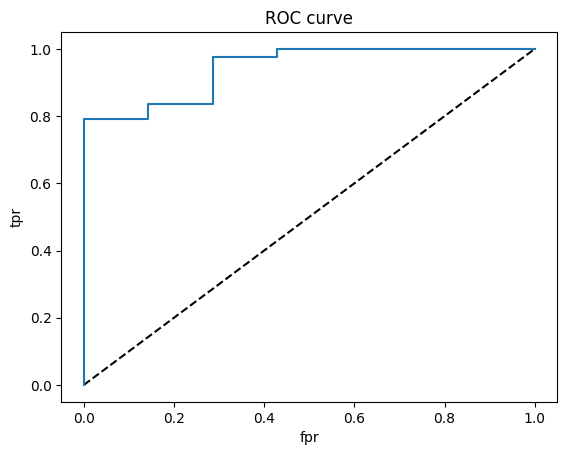

In [24]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

np.float64(0.9435215946843853)

# Clustering to find what kinds of positive type we have

I mada data frame which includes only positive case.

In [26]:
df_cancer=df[df['LUNG_CANCER']==1]
df_cancer=df.drop('LUNG_CANCER',axis=1)

In [27]:
df_cancer_sc=sc.fit_transform(df_cancer)

Elbow analysis to find the number of cluster

  File "c:\Sandesh\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Yogesh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


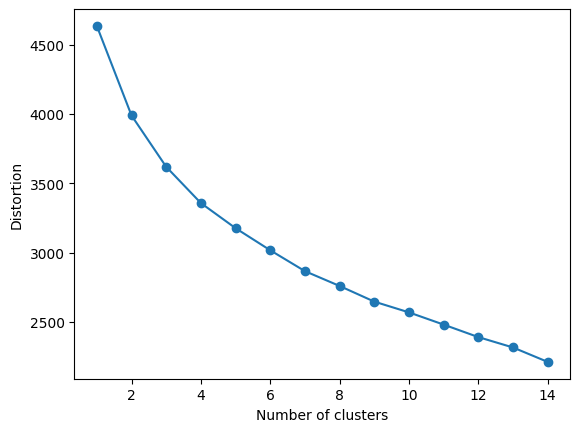

In [28]:
distortions = []

for i  in range(1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_cancer_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,15),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The number of clusters will be 5 or 6. So I tried clustering by 5 clusters.

In [29]:
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(df_cancer_sc)

In [30]:
labels = kmeans_model.labels_
df_cancer['cluster']=labels
df_cancer.groupby('cluster').mean().T

cluster,0,1,2,3,4
GENDER,0.833333,0.520833,0.896552,0.250000,0.084211
AGE,62.233333,62.687500,63.327586,62.541667,62.610526
SMOKING,1.416667,1.145833,1.793103,1.729167,1.642105
YELLOW_FINGERS,1.366667,1.770833,2.000000,1.916667,1.157895
ANXIETY,1.150000,1.708333,2.000000,1.895833,1.105263
PEER_PRESSURE,1.400000,1.312500,1.913793,1.625000,1.347368
CHRONIC DISEASE,1.750000,1.520833,1.379310,1.645833,1.347368
FATIGUE,1.833333,1.541667,1.896552,1.062500,1.810526
ALLERGY,1.450000,1.250000,1.465517,1.479167,1.873684
WHEEZING,1.283333,1.937500,1.465517,1.145833,1.800000


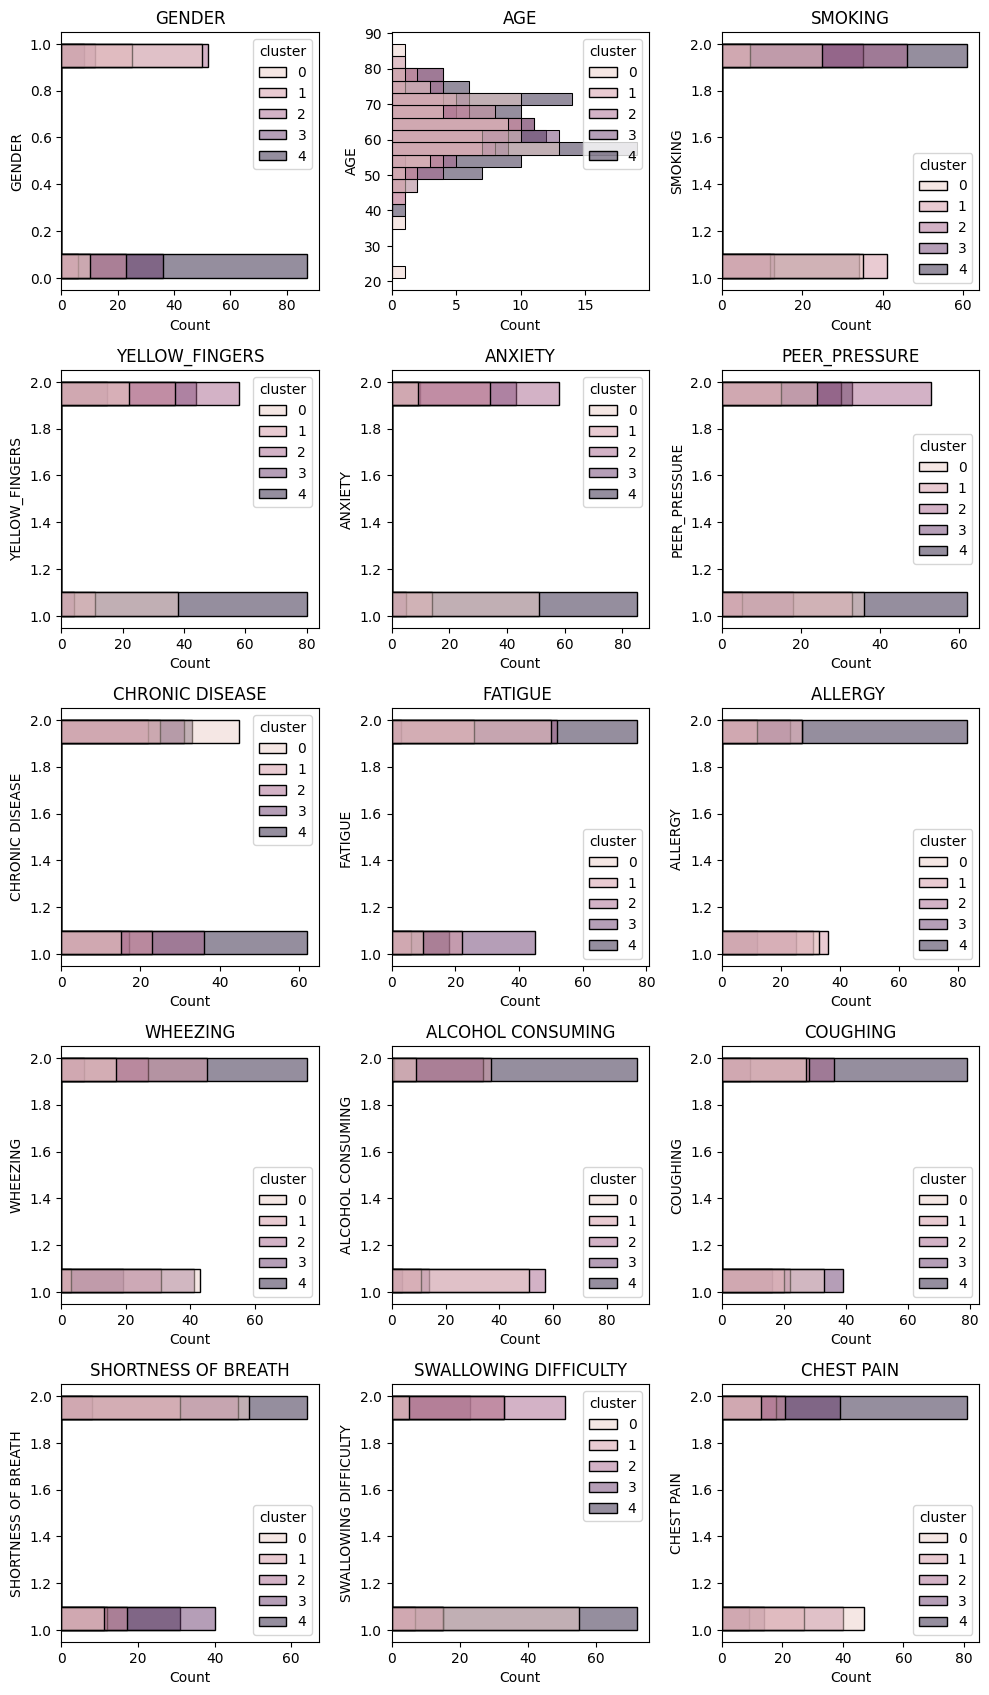

In [31]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df_cancer,y=df_cancer[num_list[i]],hue='cluster')

plt.tight_layout()

We can find features of each clusters
* Cluster 0 : Occupied by 50% male and 50% female with no smokers. Most people are suffering from 'FATIGUE' and 'WHEEZING'.
* Cluster 1 : Relatively more occupied by famale, and average age is the youngest in clusters. More than half of people are 'SMOKING' and feeling 'SHORTNESS OF BREATH'. But on the other hand, most people have 'no' features such as 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'.
* Cluster 2 : Relatively more occupied by male, more than half people aare smoking, and most people have features such as 'YELLOW_FINGERS', 'ANXIETY', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY' and 'CHEST PAIN'.
* Cluster 3 : Most occupied by male and smoking. Most people have features such as 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'CHEST PAIN'.
* Cluster 4 : Most occupied by female and smoking. Most people have features such as 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'FATIGUE' and 'SWALLOWING DIFFICULTY'.